In [2]:
from math import log10, sqrt
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

In [3]:
%cd drive/MyDrive/Project\ -\ Audiobook/

/content/drive/MyDrive/Project - Audiobook


**PSNR (Peak Signal To Noise Ratio)**

In [10]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [11]:
original = cv2.imread('./frontend/static/user-upload/aug_12-shakkthi_7/aug_12-shakkthi_7.jpeg')
compressed_adapt = cv2.imread('./frontend/static/cleaned-images/aug_12-shakkthi_7/med-aug_12-shakkthi_7.jpeg', 1)
PSNR_value_adapt = PSNR(original, original)
print(f"PSNR value for adaptive thresholding is {PSNR_value_adapt} dB")

PSNR value for adaptive thresholding is 100 dB


In [41]:
original = cv2.imread('./user-upload/aug_12-shakkthi_7-converted/0-aug_12-shakkthi_7-converted.jpeg')
compressed_median = cv2.imread('./cleaned-images/aug_12-shakkthi_7-converted/med-0-aug_12-shakkthi_7-converted.jpeg')
print(compressed_median.shape, original.shape)
PSNR_value_median = PSNR(original, compressed_median)
print(f"PSNR value for median filtering is {PSNR_value_median} dB")

(1653, 2339, 3) (1653, 2339, 3)
PSNR value for median filtering is 31.811116369199333 dB


In [42]:
original = cv2.imread('./user-upload/aug_12-shakkthi_7-converted/0-aug_12-shakkthi_7-converted.jpeg')
compressed_autoencoder = cv2.imread('./cleaned-images/aug_12-shakkthi_7-converted/auto-0-aug_12-shakkthi_7-converted.jpeg')
original = np.asarray(original, dtype="float32")
original = cv2.resize(original, (540, 420))
original = original.reshape(420,540,3)
print(compressed_autoencoder.shape, original.shape)
PSNR_value_autoencoder = PSNR(original, compressed_autoencoder)
print(f"PSNR value for autoencoder is {PSNR_value_autoencoder} dB")

(420, 540, 3) (420, 540, 3)
PSNR value for autoencoder is 14.653431471630256 dB


**MSE (Mean Squared Error)**

In [45]:
original = cv2.imread('./user-upload/aug_12-shakkthi_7-converted/0-aug_12-shakkthi_7-converted.jpeg')
compressed_adapt = cv2.imread('./cleaned-images/aug_12-shakkthi_7-converted/adapt-0-aug_12-shakkthi_7-converted.jpeg', 1)
MSE_value_adapt = np.square(np.subtract(original,compressed_adapt)).mean()
print("MSE for adaptive thresholding is: ", MSE_value_adapt)

MSE for adaptive thresholding is:  42.86458407423127


In [47]:
original = cv2.imread('./user-upload/aug_12-shakkthi_7-converted/0-aug_12-shakkthi_7-converted.jpeg')
compressed_median = cv2.imread('./cleaned-images/aug_12-shakkthi_7-converted/med-0-aug_12-shakkthi_7-converted.jpeg', 1)
MSE_value_median = np.square(np.subtract(original,compressed_median)).mean()
print("MSE for median filtering is: ", MSE_value_median)

MSE for median filtering is:  42.851765925652344


In [48]:
original = cv2.imread('./user-upload/aug_12-shakkthi_7-converted/0-aug_12-shakkthi_7-converted.jpeg')
compressed_autoencoder = cv2.imread('./cleaned-images/aug_12-shakkthi_7-converted/auto-0-aug_12-shakkthi_7-converted.jpeg')
original = np.asarray(original, dtype="float32")
original = cv2.resize(original, (540, 420))
original = original.reshape(420,540,3)
print(compressed_autoencoder.shape, original.shape)
MSE_value_autoencoder = np.square(np.subtract(original,compressed_autoencoder)).mean()
print("MSE for autoencoder is: ", MSE_value_autoencoder)

(420, 540, 3) (420, 540, 3)
MSE for autoencoder is:  2227.0872


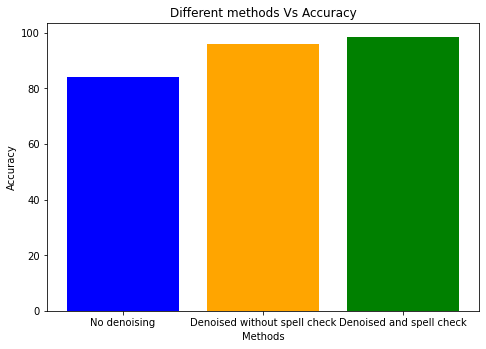

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
methods = ['No denoising', 'Denoised without spell check', 'Denoised and spell check']
acc = [84.027, 95.833, 98.611]
ax.title.set_text('Different methods Vs Accuracy')
ax.set_xlabel('Methods')
ax.set_ylabel('Accuracy')
ax.bar(methods, acc, color = ['blue', 'orange', 'green'])
plt.show()